In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


In [4]:
x_train = x_train/255
x_test = x_test/255
## This is type of scaling of values (Min-Max scaling)

In [5]:
## Here x is the image of numbers in the form of array 
## Here y is the resultant number from the image
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

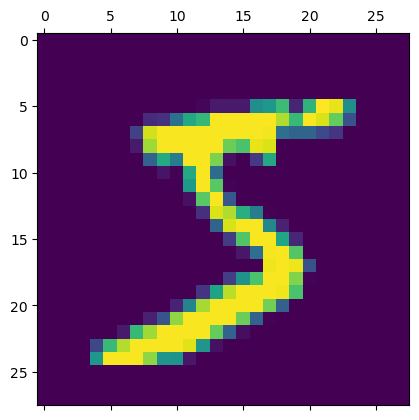

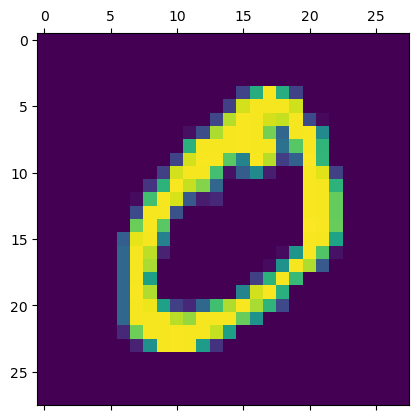

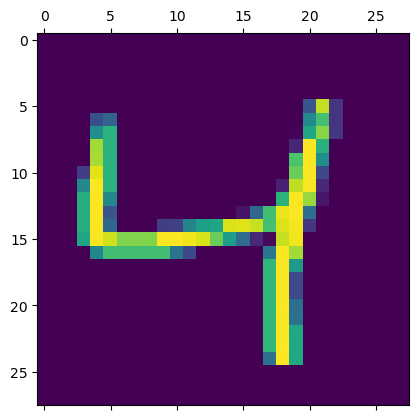

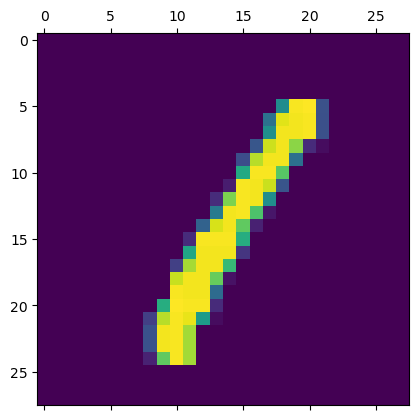

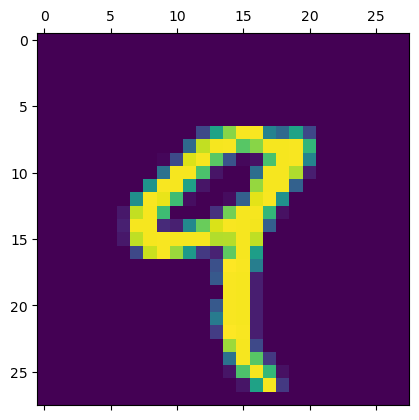

In [6]:
## For plotting in the form of image
for i in range(5):
    plt.matshow(x_train[i])

In [7]:
## For flattening use pandas reshape

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_trainFlat = x_train.reshape(len(x_train),x_train.shape[1]*x_train.shape[2])

In [10]:
x_testFlat = x_test.reshape(len(x_test),x_test.shape[1]*x_test.shape[2])

In [11]:
## Now this will make the array as single dimension array

In [12]:
## Use Keras.sequenial for making a stack 

In [23]:
## Now we are defining a neural network model using keras
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ## In this we are adding one input layer for the neural network
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.fit(x_trainFlat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4663 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2727 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2666 - accuracy: 0.9257


In [24]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14288), started 0:02:50 ago. (Use '!kill 14288' to kill it.)

In [14]:
model.evaluate(x_testFlat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2689 - accuracy: 0.9260


[0.26885533332824707, 0.9259999990463257]

In [15]:
newPredict = model.predict(x_testFlat)

313/313 [==============================] - 1s 2ms/step


In [16]:
np.argmax(newPredict[1])

2

In [17]:
yPredicted = [np.argmax(i) for i in newPredict]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=yPredicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1105,    3,    2,    0,    1,    4,    2,   18,    0],
       [   3,    6,  925,   17,    8,    3,   12,   10,   46,    2],
       [   3,    0,   21,  916,    1,   26,    2,   10,   25,    6],
       [   2,    1,    7,    1,  920,    0,   11,    4,   11,   25],
       [   7,    2,    2,   30,    8,  790,   13,    4,   34,    2],
       [   9,    3,    9,    1,    7,   17,  906,    2,    4,    0],
       [   1,    5,   23,    8,    7,    1,    0,  948,    6,   29],
       [   5,    5,    7,   17,    9,   27,    9,    6,  884,    5],
       [   9,    5,    2,    9,   29,    8,    0,   25,   17,  905]])>

Text(95.72222222222221, 0.5, 'Truth')

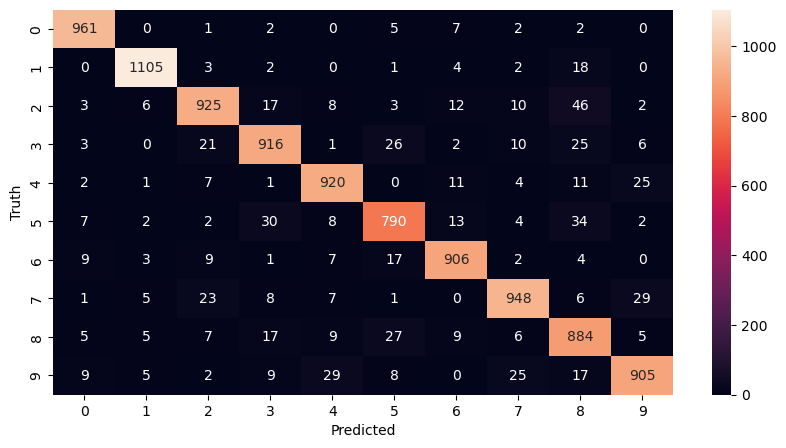

In [19]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
## Now making another neural network by adding a hidden layer in it
modelHid = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
    ## Now in this we have added 2 hidden layers in it
])

modelHid.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelHid.fit(x_trainFlat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3638 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1296 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9839


In [21]:
modelHid.evaluate(x_testFlat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9720


[0.0944521576166153, 0.972000002861023]

Reusing TensorBoard on port 6006 (pid 14288), started 0:01:59 ago. (Use '!kill 14288' to kill it.)